In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# import the train test split
from sklearn.model_selection import train_test_split

# List to store results

#  Stores the name of model
model_name = []

# Get current working directory
cwd = os.getcwd()
print(cwd)

# Uses the input file generated from preprocessing
input_file ='input_model.csv'

input_data = pd.read_csv(input_file)

# Making all column names UPPER CASE --> inline with the weather data file
input_data.columns = map(str.upper, input_data.columns)


# rename UNNAMED:0 to INDEX
input_data.rename(columns={'UNNAMED: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
input_data = input_data.drop('UNNAMED: 0.1', axis=1)

input_data.head()

# List of column names
col_names = list(input_data)

# List all column types
#input_data.dtypes

# Preprocessing

print("Shape of Original data: {}".format(input_data.shape) + "\n")

input_variables = input_data.iloc[:,4:]
print("Variables: " + str(input_variables.columns) + "\n")
print("Shape of variable data: {}".format(input_variables.shape) + "\n")

price = input_data.iloc[:,26]
returns = input_data.iloc[:,27]
returns_norm = input_data.iloc[:,28]

C:\Users\joonhay2\Desktop
Shape of Original data: (191, 29)

Variables: Index(['TMP_HIGH', 'TMP_AVG', 'TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW',
       'HUM_HIGH', 'HUM_AVG', 'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG',
       'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG',
       'PRECIP', 'NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_FOG',
       'NUM_DAYS_THNDRSTRM', 'PRICE', 'RETURN', 'RETURN_NORMALIZED'],
      dtype='object')

Shape of variable data: (191, 25)



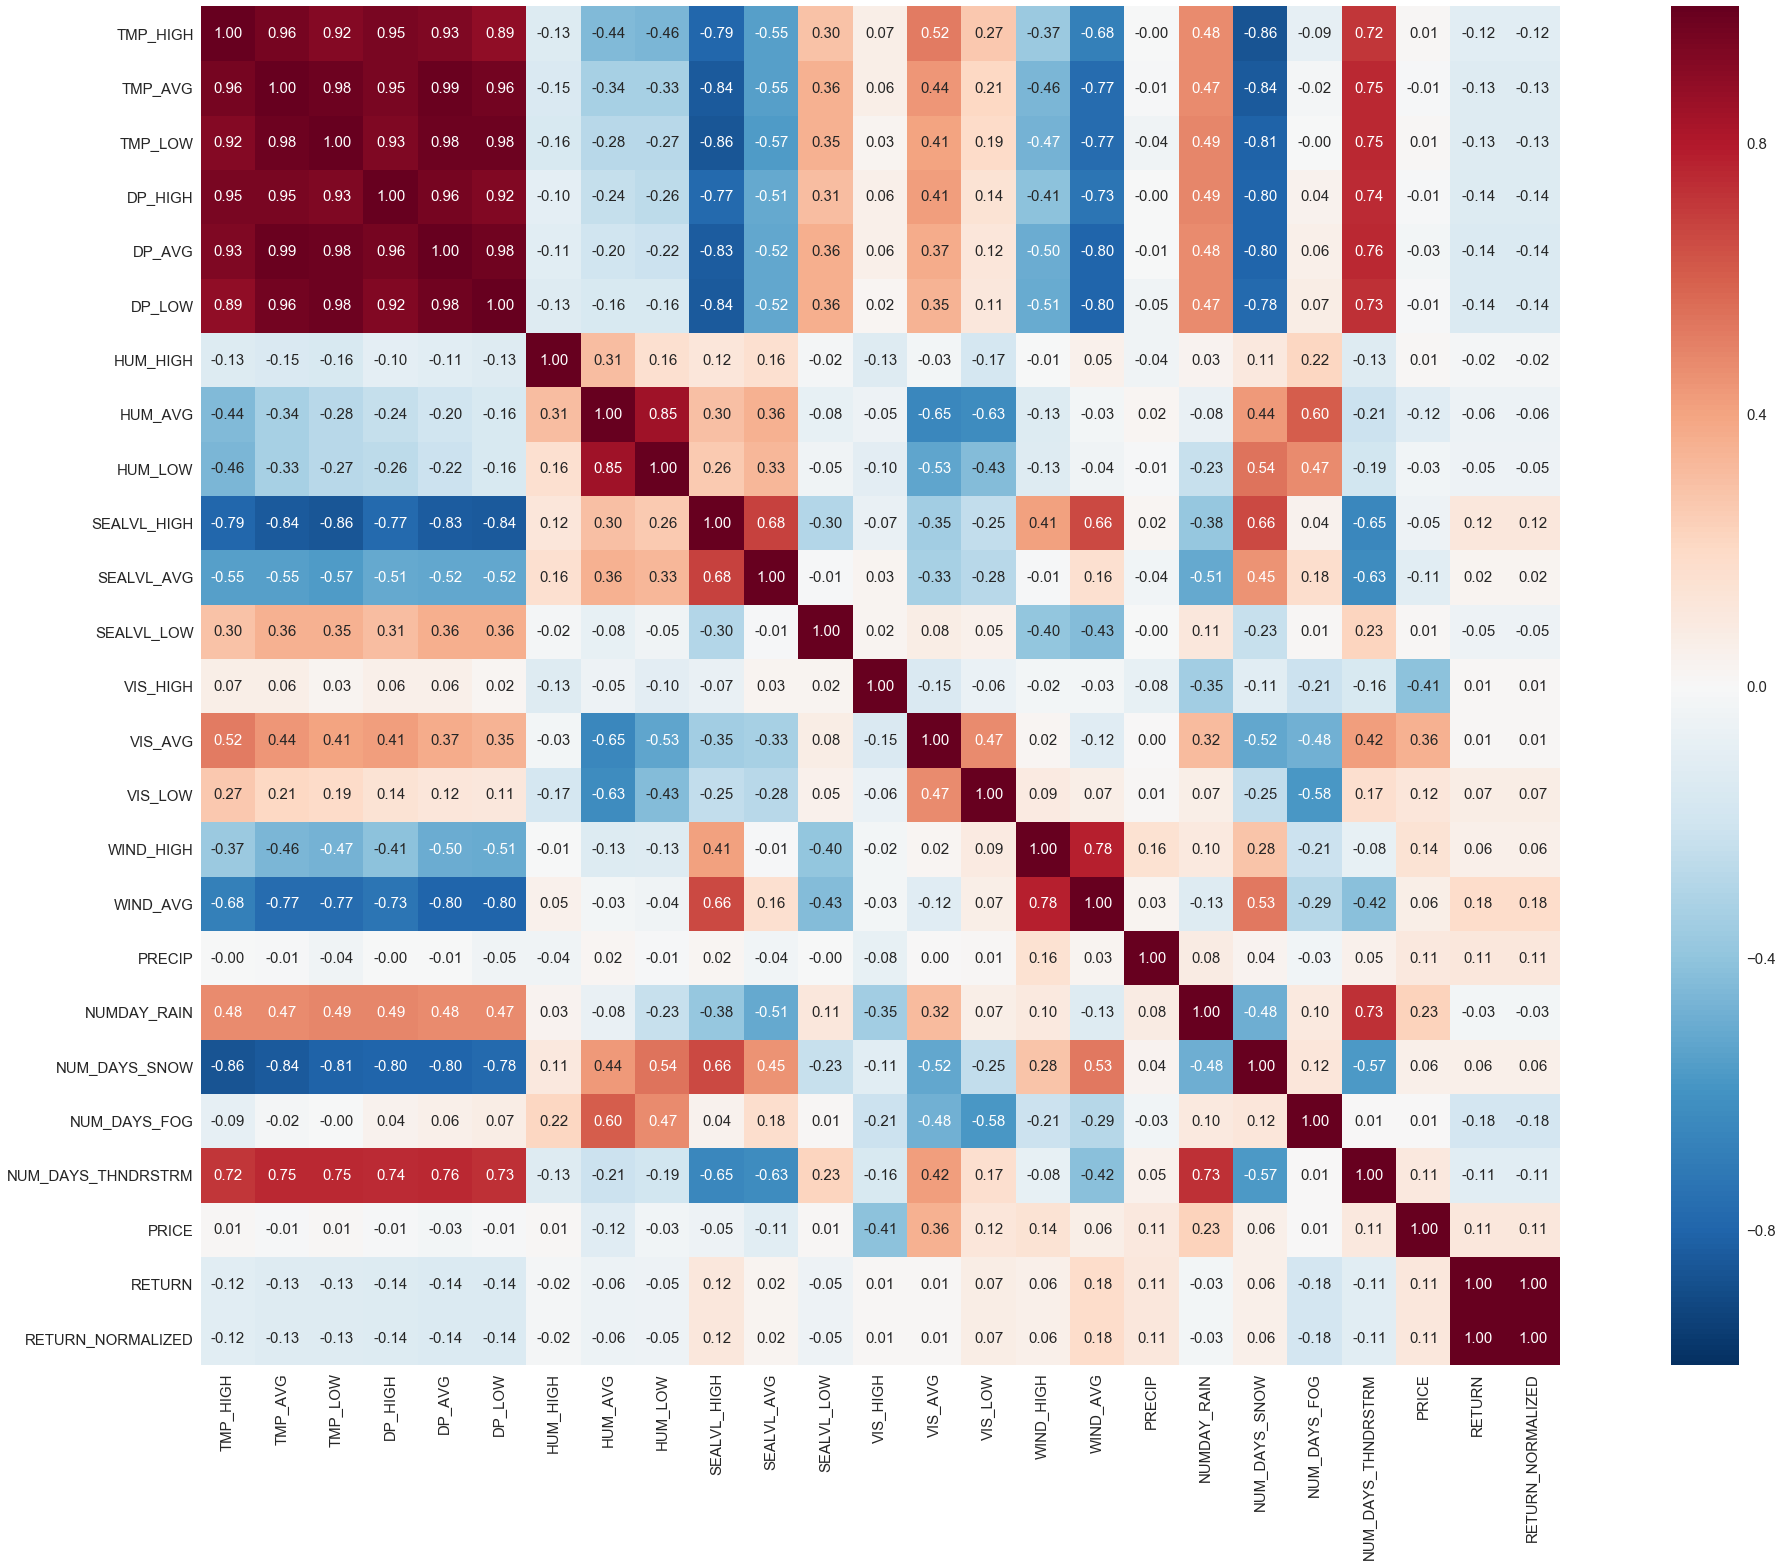

In [76]:
correlation_matrix = np.corrcoef(input_variables.values.T)
heat_map_column_names = col_names = list(input_variables)
sns.set(font_scale = 1.5)
plt.figure(figsize = (40,25))
hm = sns.heatmap(correlation_matrix,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=heat_map_column_names,
    xticklabels=heat_map_column_names)
plt.show()


In [77]:

from sklearn.linear_model import LinearRegression
no_of_trials = 400


In [82]:
model_results = []

model_scores = []
for i in range(no_of_trials):
    X_train, X_test, y_train, y_test = train_test_split(input_variables.iloc[:,0:22], price, test_size=0.2)

    # Fit a linear regression model
    lr = LinearRegression().fit(X_train, y_train)
    # Store Result and Model Name
    model_scores.append(lr.score(X_test,y_test))

model_results.append(sum(model_scores)/no_of_trials)
model_name.append("Price(Actual)")

model_scores = []
for i in range(no_of_trials):
    X_train, X_test, y_train, y_test = train_test_split(input_variables.iloc[:,0:22], returns, test_size=0.2)

    # Fit a linear regression model
    lr = LinearRegression().fit(X_train, y_train)
    # Store Result and Model Name
    model_scores.append(lr.score(X_test,y_test))

model_results.append(sum(model_scores)/no_of_trials)
model_name.append("Return")


model_scores = []
for i in range(no_of_trials):
    X_train, X_test, y_train, y_test = train_test_split(input_variables.iloc[:,0:22], returns_norm, test_size=0.2)

    # Fit a linear regression model
    lr = LinearRegression().fit(X_train, y_train)
    # Store Result and Model Name
    model_scores.append(lr.score(X_test,y_test))

model_results.append(sum(model_scores)/no_of_trials)
print(model_results)
model_name.append("Return_Norm")


[0.200109155787601, -0.29136303228119526, -0.30251858438284496]


In [ ]:
model_results


In [80]:
100*returns_norm


0      -0.191797
1      -0.848174
2      -3.999879
3      -1.554359
4       1.910179
5       0.033673
6      -1.953308
7      -2.911174
8       0.537990
9       2.435212
10     -3.904773
11      1.141309
12     -1.501260
13     -0.848174
14     -0.411693
15      0.224213
16      3.001242
17      3.396720
18     -0.323868
19     -3.350974
20     -1.403782
21     -0.108931
22     -9.097401
23      7.401054
24     -1.216222
25     -0.663760
26      0.421253
27     -1.569011
28     -4.445696
29     -1.645067
         ...    
161    -5.050735
162    -3.604622
163     0.009417
164    -0.245814
165     1.253661
166     9.543865
167   -11.126374
168    -1.305330
169    -0.733433
170    -2.841238
171    -0.489744
172     1.468613
173    -3.403584
174    -0.136200
175    -0.730638
176    -0.848174
177     0.195575
178    -1.774704
179    -0.614681
180    -2.028394
181    -0.372230
182     0.891556
183     0.274097
184    -4.186118
185    -6.732910
186     0.500675
187    -0.451555
188    -0.5857